**Bellabeat Case Study**

# 1. Ask
**Questions**
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
**Business Task**
:-Analyzing smart device data to gain insight into how consumers are using their smart devices and to use this data in Bellabeat’s marketing strategy, thus resulting in growth of the company. 

**Stakeholders**
* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

**Summary**
:-Bellabeat is a high-tech company that manufactures health-focused smart products.They offer different smart devices such as: Bellabeat app, Time, Spring, etc that collect data on activity, sleep, stress to empower women with knowledge about their own health and habits.
This case study will mainly focus on Bellabeat app and its User data.

# 2. Prepare

**Storing and organising Data**
:-I've filtered and sorted the data in Google Spreadsheets. And used SQL for organising and cleaning the Data.

**Data Source Used**
:-Dataset used in this case is from Kaggle FitBit Fitness Tracker Data and it is made avaible through Mobius.

**Biasness or credibility**
:-No biasness found in this data.

**Licensing, Privacy, Security, and Accessibility of Data**
* Licensing-CC0: Public Domain
* Accessibility of Data - Dataset used in this case study is a Public Data source so it has free acess, usage, and sharing of data. 

**Data’s integrity**
:-Data is Accurate and trustworthy as it is obtained from Users of Bellabeat, but data is inconsistent and incomplete as many users failed to fill their sleeping schedule . Also the dataset is not Up-to-date as it was collected in 2016.

**About data**
:-Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

# 3. Process
**Summary Of Cleaning and Organising the Data**
1. Google Spreadsheets for Filtering and Sorting the data.
:-Used Funtions such as Remove Duplicates(to filter Unique IDs), AVERAGE(to average the total steps of Users), COUNT(to count the active days of Users), COUNTIF(to count number of IDs), VLOOKUP(to search for certain values and return corresponding information), Changed the date format, Used Conditional formatting to highlight Ids with (Active_days) less than 30 
and Ids who failed to fill their sleeping schedule(ie.Avg_Total_Minutes_Asleep).
* [See Google Spreadsheets results here- For Activity_data of each User](https://docs.google.com/spreadsheets/d/1FNKTle5BrKFVmQr4ebIVlt1OR6lBJ1B9CQJOFDMU_3Y/edit?usp=sharing).
*  [Google Spreadsheet- Sleep record per Id](https://docs.google.com/spreadsheets/d/1UqhAS26qsL7o7ntwrHcdtcoipQ_A2rJ548Dw-KKRbn0/edit?usp=sharing).


2. Organising and Cleaning Data in SQL(BigQuery). 
:-Used Basic Functions such as COUNT(to count the Total Minutes Asleep per Ids), AVG(to get average of Total Minutes Asleep), DISTINCT(to get distinct and unique Ids), JOIN(to join tables on related column).
* [Sleep recorded per day by Ids and Average total Minutes Asleep of User](https://console.cloud.google.com/bigquery?sq=554595511095:92dce3387d0146e3852d2b5e216471c7).
* [Average Activity of Users per Miuntes](https://console.cloud.google.com/bigquery?sq=554595511095:3054449e6ca34dc8b79d25a300c93924).
* [Average (Calories,Total step, Total Minutes Asleep, Active Minutes) per Id](https://console.cloud.google.com/bigquery?sq=554595511095:439acc336e35485185ff04663a69031d).


# 4. Analyze and share
**Using R to find trends and visualization**

* Loading Packages and Importing Cleaned, Organised Datasets.











In [ ]:
library(ggplot2)
library(tidyverse)
library(skimr)
library(janitor)
library(dplyr)
library(lubridate)

activity_data <-read_csv("/kaggle/input/activity-data/Bellabeat_dataset - activity_data (1).csv")
Avg_activity  <-read_csv("/kaggle/input/avg-activtycsv/Bellabeat_dataset - Avg_activity.csv")
IDs_sleep_record  <-read_csv("/kaggle/input/ids-sleep-record/IDs_sleep_record - IDs_sleep_record.csv")


In [4]:
head(activity_data)
head(Avg_activity)
head(IDs_sleep_record)


Id,Active_days,Avg_total_steps,Avg_calories,Avg_Total_Minutes_Asleep,Avg_Active_Minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,31,12116.74,1816.419,360.28,1426
1624580081,31,5743.90,1483.355,0.00,1371
1644430081,30,7282.97,2786.097,294.00,1426
1844505072,31,2580.06,1573.484,652.00,974
1927972279,31,916.13,2172.806,417.00,962
2022484408,31,11370.65,2509.968,0.00,980


Id,Avg_Very_Active_Minutes,Avg_Fairly_Active_Minutes,Avg_Lightly_Active_Minutes,Avg_Sedentary_Minutes,Avg_Active_Minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1624580081,9,6,153,1258,1426
1644430081,10,21,178,1162,1371
2022484408,36,19,257,1113,1426
2347167796,14,21,253,687,974
3977333714,19,61,175,708,962
4319703577,4,12,229,736,980


Id,sleep_recorded_by_ID_per_Days,AvgTotalMinutesAsleep,Avg_calories_per_Id,Avg_total_steps,Avg_Active_Minutes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,25,360,1816,12117,1126
1644430081,4,294,2786,7283,1371
1844505072,3,652,1573,2580,1323
1927972279,5,417,2173,916,1358
2026352035,28,506,1541,5567,946
2320127002,1,61,1724,4717,1422


**Looking for any Trends, Patterns or Correlations**

**1.** Looking for any Trends between Calories and Total Steps by using **geom_point and geom_smooth.***

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


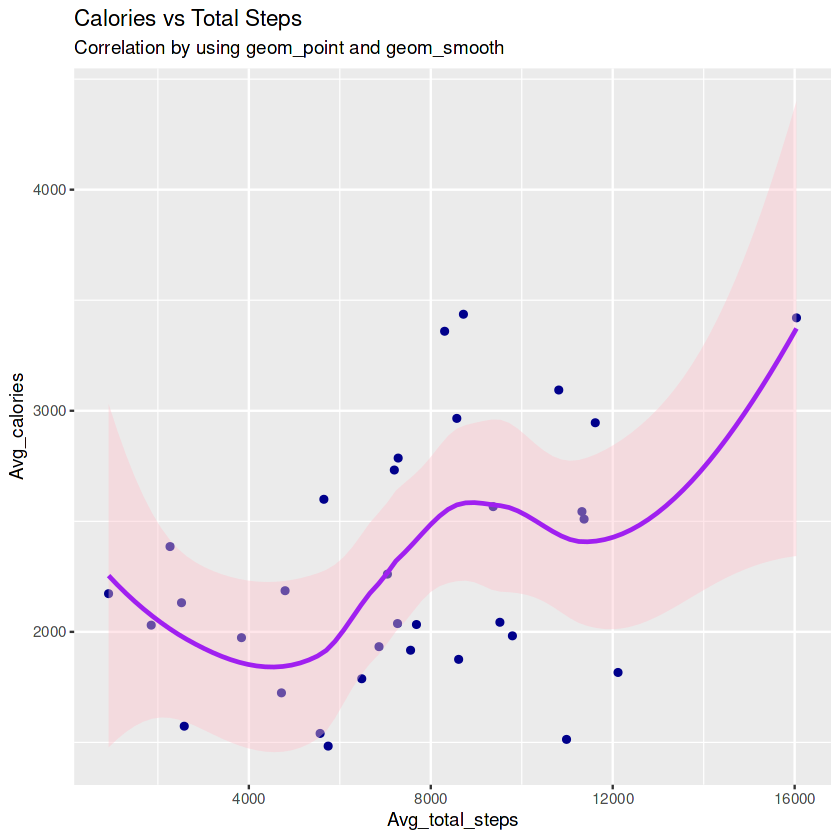

In [5]:
ggplot(data = activity_data)+ 
geom_point((aes(x=Avg_total_steps, y=Avg_calories)),color="dark blue") + geom_smooth(aes(x=Avg_total_steps, y=Avg_calories),color="purple",fill="pink") + 
labs(title="Calories vs Total Steps",subtitle= "Correlation by using geom_point and geom_smooth")

* There is a **Positive Correlation** between Total Steps and Calories which is obvious as more steps walked more calories are burned.
* Looking for Correlation between Avg_calories and Avg_total_steps by using **Scatterplot**.

`geom_smooth()` using formula = 'y ~ x'


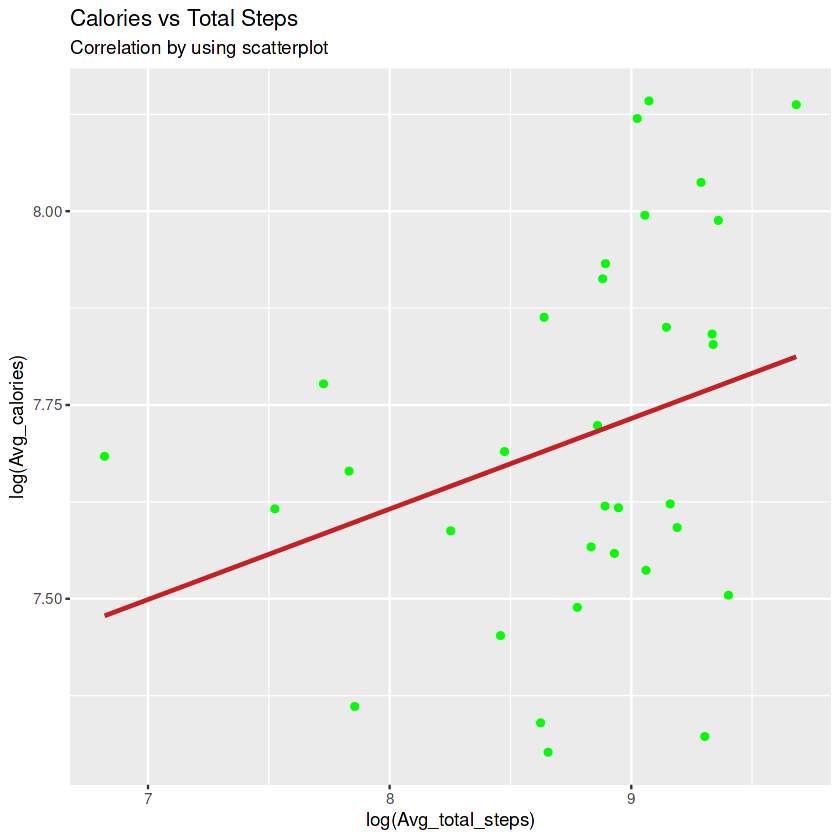

In [6]:
ggplot(activity_data, aes(x = log(Avg_total_steps), y = log(Avg_calories))) +
        geom_point(aes(x = log(Avg_total_steps), y = log(Avg_calories)),color="Green") +
        stat_smooth(method = "lm",
        col = "#C42126", se = FALSE, linewidth = 1)+
        labs(title="Calories vs Total Steps",subtitle="Correlation by using scatterplot")

**2.** Merging Avg_activity and IDs_sleep_record to find any pattern or correlation between AvgTotalMinutesAsleep and Avg_Sedentary_Minutes.

In [23]:
cleaned_data <- merge(Avg_activity, IDs_sleep_record,by=c ("Id"))
head(cleaned_data)




,Id,Avg_Very_Active_Minutes,Avg_Fairly_Active_Minutes,Avg_Lightly_Active_Minutes,Avg_Sedentary_Minutes,Avg_Active_Minutes.x,sleep_recorded_by_ID_per_Days,AvgTotalMinutesAsleep,Avg_calories_per_Id,Avg_total_steps,Avg_Active_Minutes.y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,39,19,220,848,1126,25,360,1816,12117,1126
2,1644430081,10,21,178,1162,1371,4,294,2786,7283,1371
3,1844505072,0,1,115,1207,1323,3,652,1573,2580,1323
4,1927972279,1,1,39,1317,1358,5,417,2173,916,1358
5,2026352035,0,0,257,689,946,28,506,1541,5567,946
6,2320127002,1,3,198,1220,1422,1,61,1724,4717,1422


* Looking for correlation between Avg_Sedentary_Minutes and AvgTotalMinutesAsleep using **Scatterplot**

`geom_smooth()` using formula = 'y ~ x'


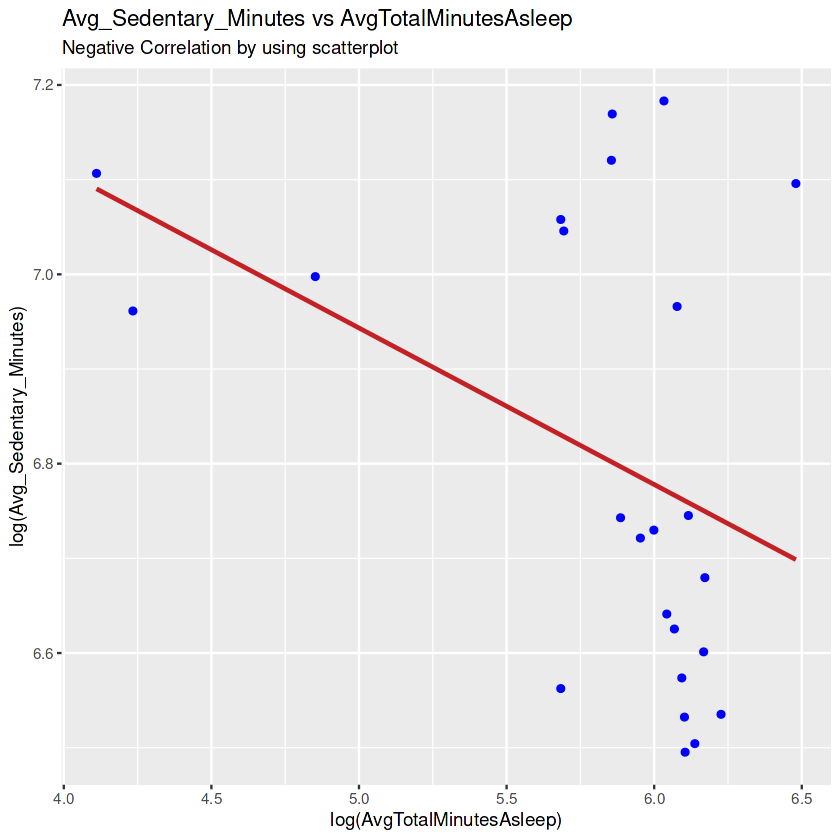

In [8]:
ggplot(data=cleaned_data, aes(x = log(AvgTotalMinutesAsleep), y = log(Avg_Sedentary_Minutes))) +
        geom_point(aes(x =log(AvgTotalMinutesAsleep),y =log(Avg_Sedentary_Minutes)),color="blue") +
        stat_smooth(method = "lm",
        col = "#C42126", se = FALSE, linewidth = 1)+
        labs(title="Avg_Sedentary_Minutes vs AvgTotalMinutesAsleep ",subtitle="Negative Correlation by using scatterplot")        

There is **Negative Correlation** between Avg_Sedentary_Minutes and AvgTotalMinutesAsleep.
* Plot indicates that more the sedentary time, less the sleep time.

**3.** Looking for Trends or Correlation in Avg_Sedentary_Minutes and Avg_total_steps

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


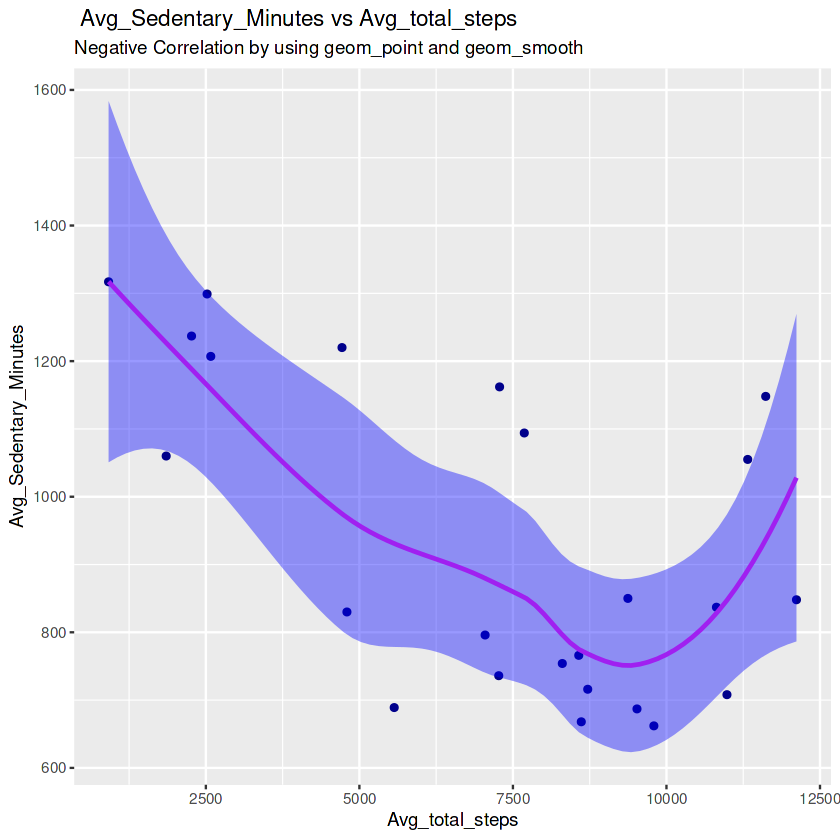

In [9]:
ggplot(data=cleaned_data)+ 
geom_point(mapping=aes(x=Avg_total_steps, y=Avg_Sedentary_Minutes),color="dark blue") + 
geom_smooth(mapping=aes(x=Avg_total_steps, y=Avg_Sedentary_Minutes),color="purple",fill="blue")+ 
labs(title=" Avg_Sedentary_Minutes vs Avg_total_steps ",subtitle="Negative Correlation by using geom_point and geom_smooth")

`geom_smooth()` using formula = 'y ~ x'


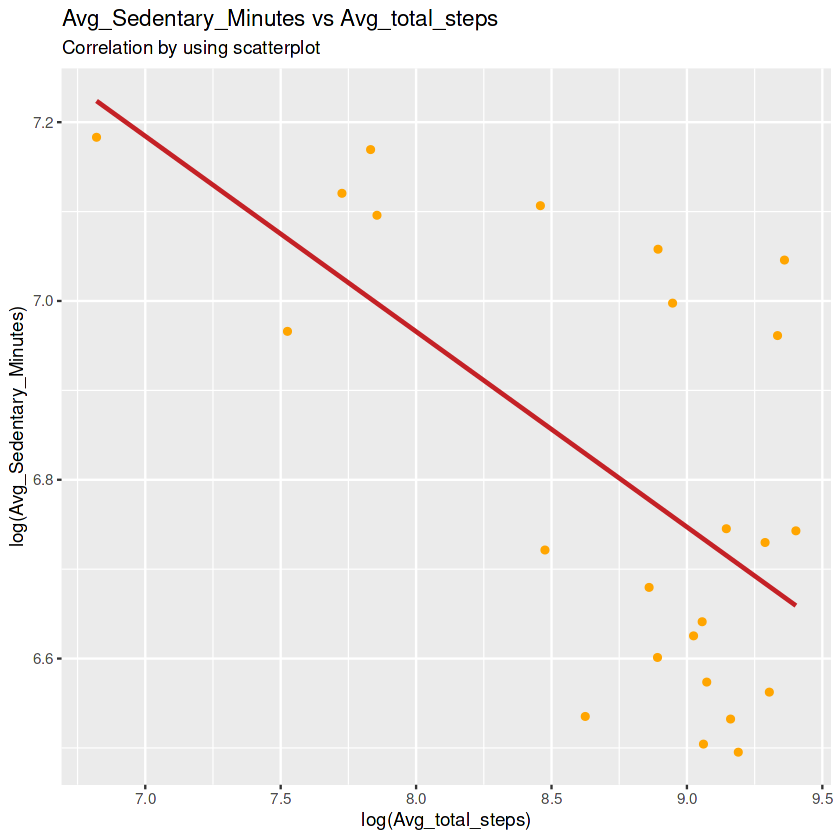

In [10]:
ggplot(data=cleaned_data, aes(x = log(Avg_total_steps), y = log(Avg_Sedentary_Minutes))) +
        geom_point(aes(x =log(Avg_total_steps),y =log(Avg_Sedentary_Minutes)),color="orange") +
        stat_smooth(method = "lm",
        col = "#C42126", se = FALSE, linewidth = 1)+
        labs(title="Avg_Sedentary_Minutes vs Avg_total_steps  ",subtitle="Correlation by using scatterplot")    

There is **Negative correlation** between Avg_Sedentary_Minutes and Avg_total_steps .



**4.** Assigning the User Ids user_type based on their Avg_total_steps.

In [11]:
user_type <- activity_data %>%
  mutate(user_type = case_when(
    Avg_total_steps < 5000 ~ "sedentary",
    Avg_total_steps >= 5000 & Avg_total_steps < 7499 ~ "lightly active", 
    Avg_total_steps >= 7500 & Avg_total_steps < 9999 ~ "fairly active", 
    Avg_total_steps >= 10000 ~ "very active"
  ))
head(user_type)


Id,Active_days,Avg_total_steps,Avg_calories,Avg_Total_Minutes_Asleep,Avg_Active_Minutes,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,31,12116.74,1816.419,360.28,1426,very active
1624580081,31,5743.90,1483.355,0.00,1371,lightly active
1644430081,30,7282.97,2786.097,294.00,1426,lightly active
1844505072,31,2580.06,1573.484,652.00,974,sedentary
1927972279,31,916.13,2172.806,417.00,962,sedentary
2022484408,31,11370.65,2509.968,0.00,980,very active


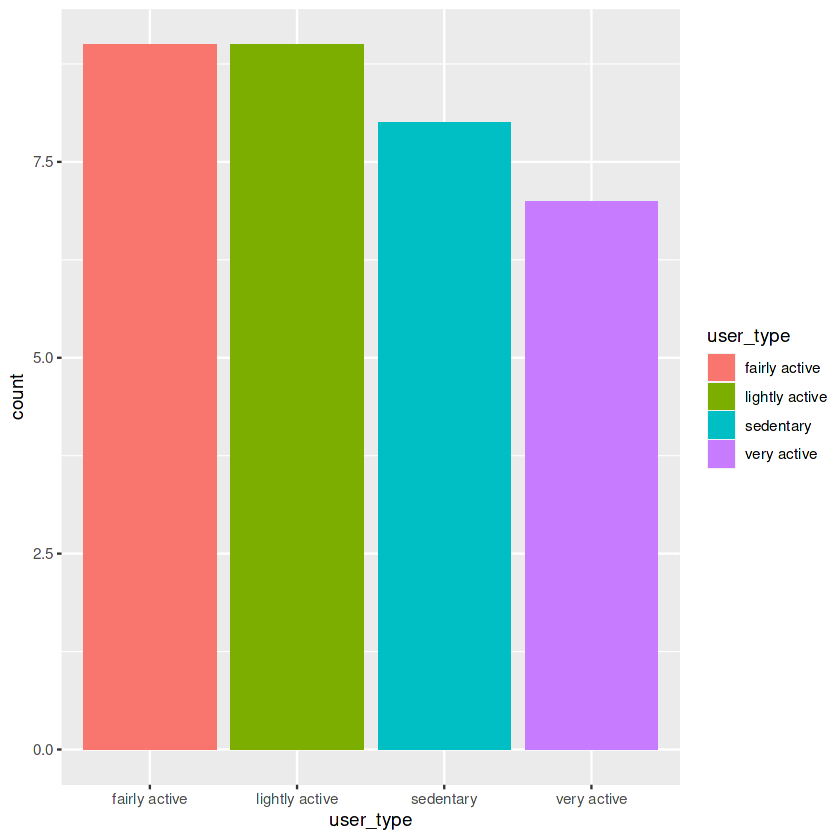

In [12]:
ggplot(data=user_type)+ geom_bar(mapping =aes(x=user_type,fill=user_type))

In [13]:
user_type_percent <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$user_type <- factor(user_type_percent$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))


head(user_type_percent)

user_type,total_percent,labels
<fct>,<dbl>,<chr>
fairly active,0.2727273,27.3%
lightly active,0.2727273,27.3%
sedentary,0.2424242,24.2%
very active,0.2121212,21.2%


* Percentage of User Type based on their Activity.

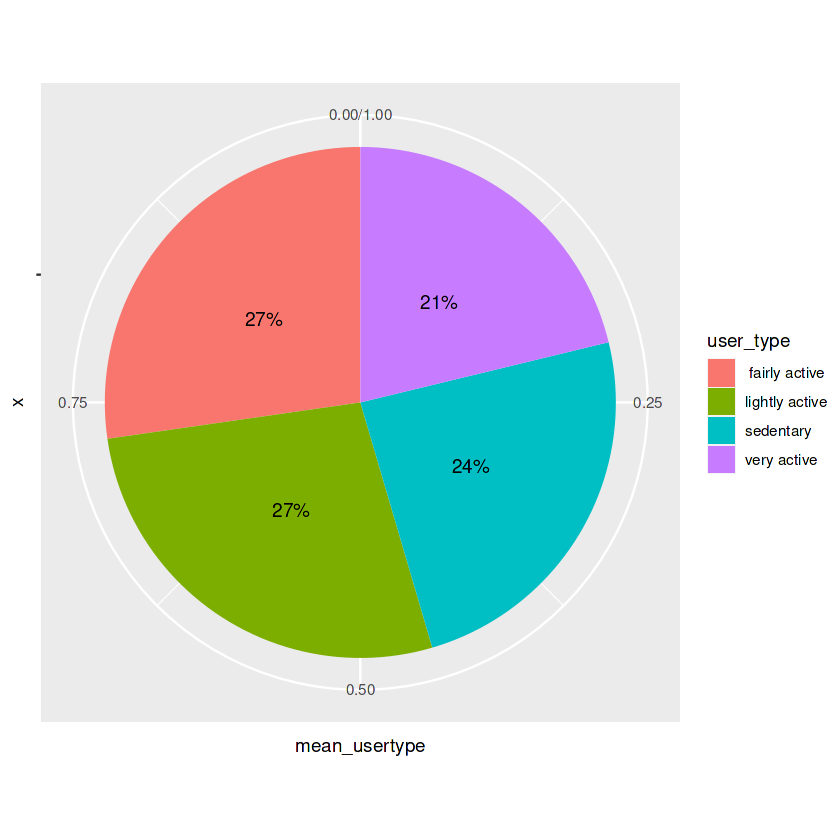

In [14]:

data_frame<- data.frame(user_type=c(" fairly active","lightly active","sedentary","very active"),total_percentage= c(0.2727273,0.2727273,0.2424242,0.2121212))
  
# creating a pie chart in order 
data_frame%>%
  group_by(user_type)%>%
  summarise(ut_total_percentage= sum(total_percentage)) %>%
  mutate(mean_usertype=ut_total_percentage/sum(ut_total_percentage)) %>%
  ggplot(aes(x="", y= mean_usertype, 
             fill=user_type,ut_total_percentage )) +
            geom_col() + geom_text(aes(label = scales::percent(round(mean_usertype,2))), 
            position = position_stack(vjust = 0.5))+
  coord_polar(theta = "y")

* There are 27% Users who are fairly active, 27% Users who are lightly active, 24% Users who are sedentary and 21% Users who are very active.

**5.** Calculating the percentage of users that use their Bellabeat app on daily basis and assigning them under 'Very Low use' , 'Low use' , 'Moderate use' and 'High use' category.

In [64]:
 IDs_sleep_record_2  <-IDs_sleep_record%>% 
  mutate(recorded_sleep = case_when(
   sleep_recorded_by_ID_per_Days <=7.5~ 'Very Low use',
   sleep_recorded_by_ID_per_Days <= 15~ 'Low use',
   sleep_recorded_by_ID_per_Days <= 21.5~ ' Moderate use',
   TRUE ~'High use'))
head( IDs_sleep_record_2 )

Id,sleep_recorded_by_ID_per_Days,AvgTotalMinutesAsleep,Avg_calories_per_Id,Avg_total_steps,Avg_Active_Minutes,recorded_sleep
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,25,360,1816,12117,1126,High use
1644430081,4,294,2786,7283,1371,Very Low use
1844505072,3,652,1573,2580,1323,Very Low use
1927972279,5,417,2173,916,1358,Very Low use
2026352035,28,506,1541,5567,946,High use
2320127002,1,61,1724,4717,1422,Very Low use


In [55]:
IDs_sleep_record_2%>%
count(recorded_sleep)

recorded_sleep,n
<chr>,<int>
Moderate use,1
High use,12
Low use,3
Very Low use,8


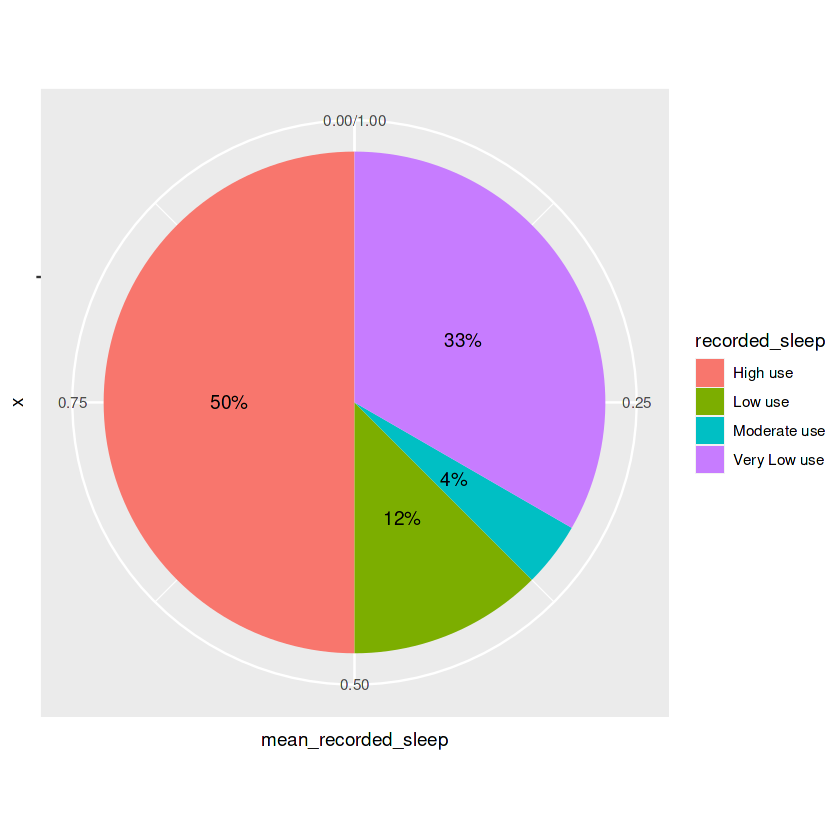

In [62]:
IDs_sleep_record_3 <- data.frame(recorded_sleep=c("Very Low use","Low use","Moderate use","High use"),sleep_recorded_by_ID_per_Days=c(8,3,1,12))
IDs_sleep_record_3%>%
group_by(recorded_sleep)%>%
  summarise(recorded_sleep_percentage= sum(sleep_recorded_by_ID_per_Days)) %>%
  mutate(mean_recorded_sleep=recorded_sleep_percentage/sum(recorded_sleep_percentage)) %>%
  ggplot(aes(x="", y=mean_recorded_sleep , 
             fill=recorded_sleep,recorded_sleep_percentage )) +
            geom_col() + geom_text(aes(label = scales::percent(round(mean_recorded_sleep,2))), 
            position = position_stack(vjust = 0.5))+
  coord_polar(theta = "y")

* There are 50% Users who have high usage of Bellabeat app, 33% have Very low usage, 12% Low usage, 4% have Moderate usage.

# 5. Act
**Key findings and Recommendations based on Analysis**
1. There is a **Positive Correlation** between Total Steps and Calories so if the users are trying to be fit Bellabeat app can send them notification of steps required to burn certain amount of calories.
2. There is **Negative Correlation** between Sedentary Minutes and Average Total Minutes Asleep so if users want to improve their sleeping schedule Bellabeat app can send notifications for bed time and avoid Sedentary time.
3. There is **Negative correlation** between Average Total Steps and Average Sedentary Minutes. So if users intend to be fit and burn more calories, Bellabeat can notify users to be active or to take a walk during light active, fairly active and sedentary active minutes because steps and calories are directly proportional.
4. Messages notifying less activity should be send to **27%** Users who are fairly active, **27%** Users who are lightly active and **24%** Users who are sedentary whereas rewarding notifications should be sent to **21%** Users who are very active.
5. There are **50%** Users who have regularly used their Bellabeat app, **33%** users have Very low usage, **12%** users have Low usage,and **4%** have Moderate usage. So inorder to improve the rate of usage by users messages containing health awareness, motivational quotes and the benefits of living a healthy lifestyle should be send.
6. Bellabeat can use these findings and advertise the health well-being of the regular users over the Non or less users.
* [Tableau Data Visualization here](https://public.tableau.com/views/BellabeatCaseStudy_16783622676070/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)